In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
labels = train_data['label']
features = train_data.drop('label', axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=99)
# y_train = to_categorical(y_train, num_classes=10)
# y_val = to_categorical(y_val, num_classes=10)

In [4]:
model = models.Sequential()
leaky_relu = layers.LeakyReLU(alpha=0.05)
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3, 3), activation=leaky_relu))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation=leaky_relu))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
x_train_reshaped, x_test_reshaped = x_train.values.reshape(-1, 28, 28, 1), x_test.values.reshape(-1, 28, 28, 1)
history = model.fit(x_train_reshaped, y_train, epochs=50, batch_size=128, validation_data=(x_test_reshaped, y_test))

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


263/263 [==============================] - 10s 6ms/step - loss: 0.9558 - accuracy: 0.9067 - val_loss: 0.1036 - val_accuracy: 0.9692
Epoch 2/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0701 - accuracy: 0.9778 - val_loss: 0.0713 - val_accuracy: 0.9779
Epoch 3/50
263/263 [==============================] - 1s 5ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0679 - val_accuracy: 0.9805
Epoch 4/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.0695 - val_accuracy: 0.9804
Epoch 5/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0638 - val_accuracy: 0.9842
Epoch 6/50
263/263 [==============================] - 1s 5ms/step - loss: 0.0155 - accuracy: 0.9944 - val_loss: 0.0893 - val_accuracy: 0.9799
Epoch 7/50
263/263 [==============================] - 1s 5ms/step - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.0814 - val_accuracy: 0.9806
Epoch 8/50
263/2

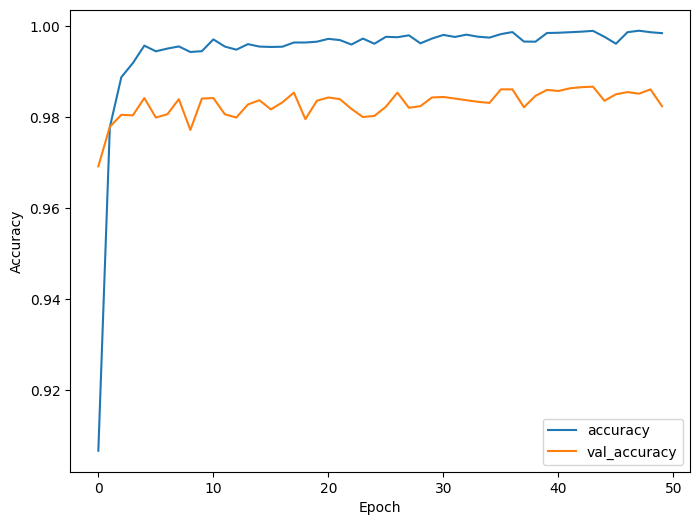

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

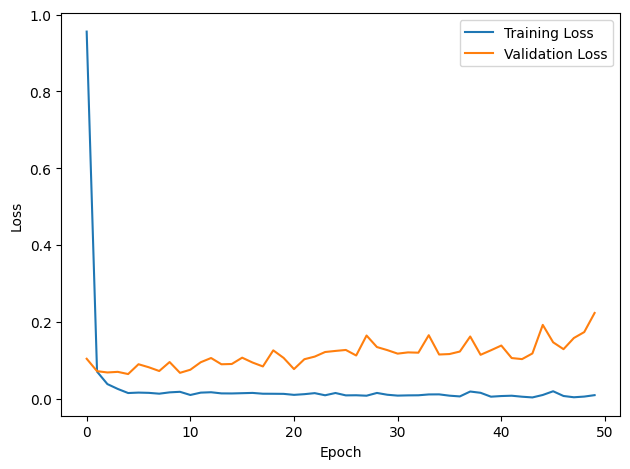

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## Train with all data

In [9]:
features_reshaped = features.values.reshape(-1, 28, 28, 1)
model.fit(features_reshaped, labels, epochs=25, batch_size=128, validation_data=(x_test_reshaped, y_test))

Epoch 1/25
329/329 [==============================] - 2s 6ms/step - loss: 0.0399 - accuracy: 0.9936 - val_loss: 0.0214 - val_accuracy: 0.9943
Epoch 2/25
329/329 [==============================] - 2s 5ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 3/25
329/329 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9982
Epoch 4/25
329/329 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 5/25
329/329 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0064 - val_accuracy: 0.9983
Epoch 6/25
329/329 [==============================] - 1s 4ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0165 - val_accuracy: 0.9962
Epoch 7/25
329/329 [==============================] - 1s 4ms/step - loss: 0.0190 - accuracy: 0.9962 - val_loss: 0.0165 - val_accuracy: 0.9957
Epoch 

## Predication & Submit

In [10]:
test_features_reshaped = test_data.values.reshape(-1, 28, 28, 1)
predictions = model.predict(test_features_reshaped)
predicted_labels = np.argmax(predictions, axis=1)
submission = pd.DataFrame({'ImageId': range(1, len(predicted_labels) + 1), 'Label': predicted_labels})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

875/875 [==============================] - 2s 2ms/step


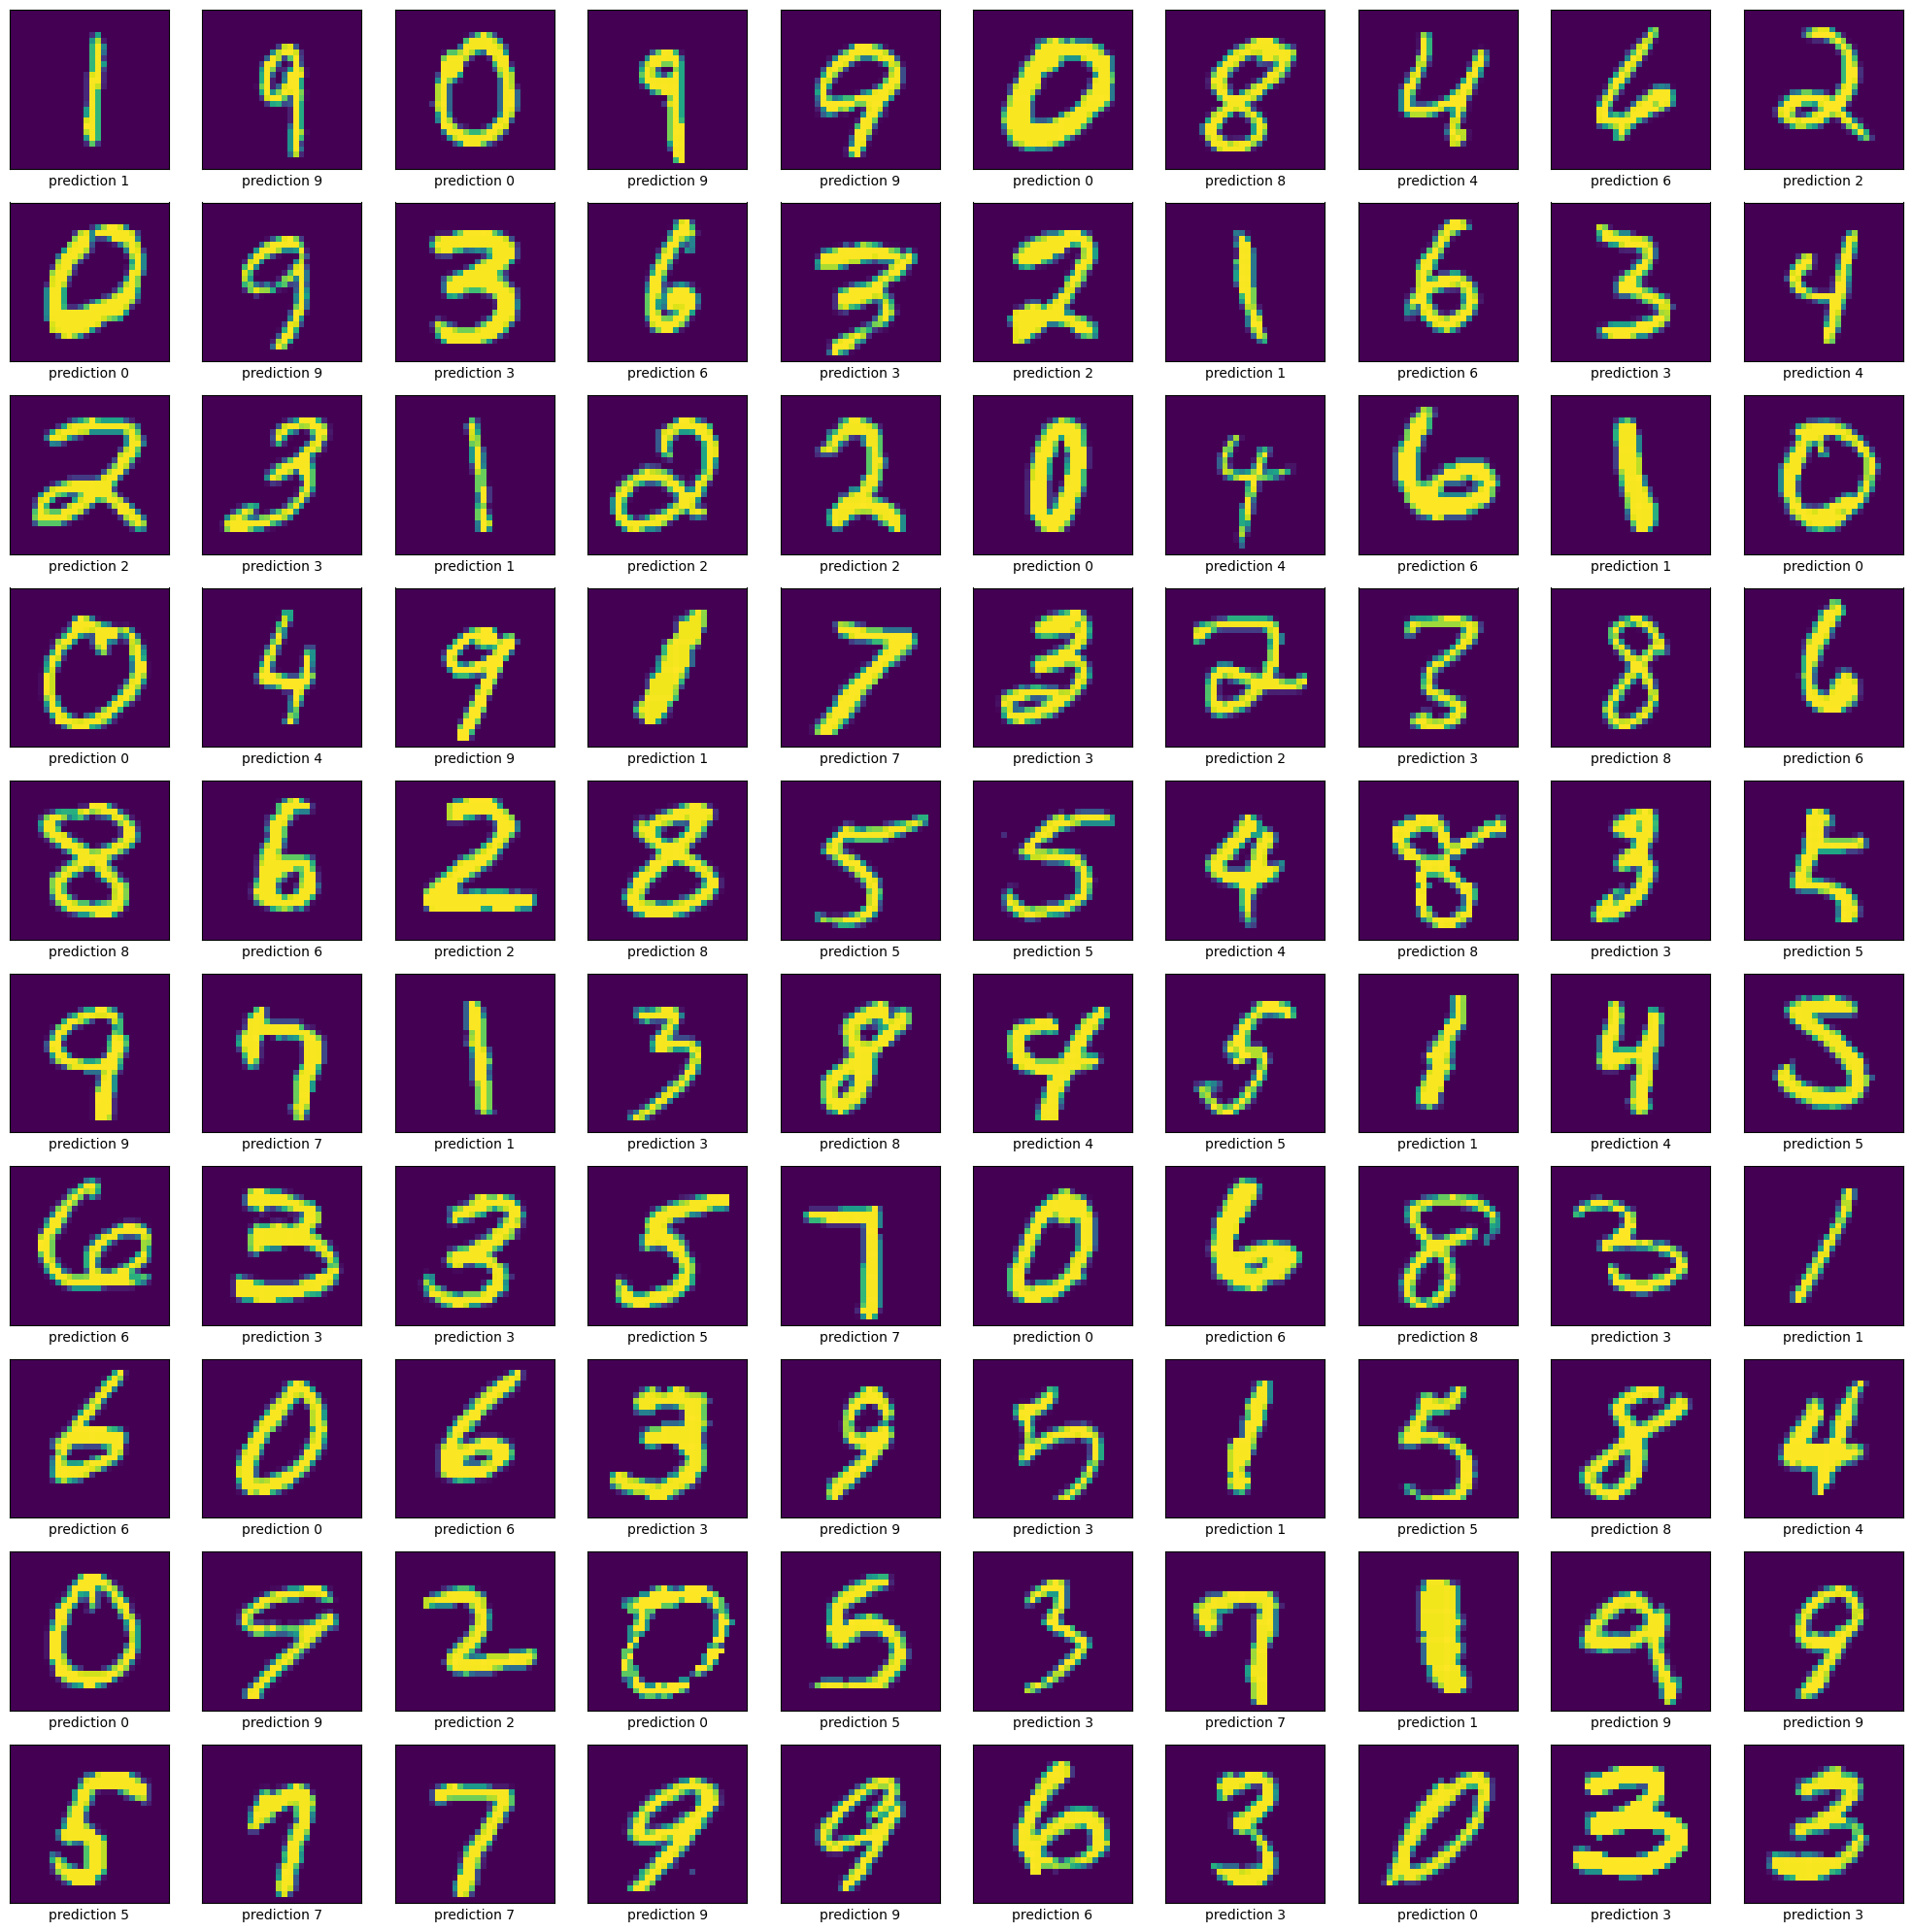

In [11]:
def plot_image(i):
    lable = np.argmax(predictions[i])
    plt.imshow(test_features_reshaped[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(f'prediction {lable}')

num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
start = 200
for i in range(start, start+num_images):
  plt.subplot(num_rows, num_cols, i+1-start)
  plot_image(i)
plt.tight_layout()
plt.show()